In [1]:
# ENGO Sentiment Analysis Visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sys
import os

In [2]:
sys.path.append(os.path.abspath('..'))

In [3]:
# Add path for custom modules
sys.path.append(os.path.abspath('..'))
from src.plots import plot_sentiment_comparison3
from src.data_processing import (
    process_cop_data, 
    EVENTS_COP26, 
    EVENTS_COP27, 
    LEGEND_NAMES
)

In [4]:
# Define file paths
COP26_PATH = r"C:\Users\PsyLab-9221\Documents\thesis\ENGO-emotional-framing\data\results_file_cop26_sentiment+Relevance+Group_new_240624_split_1.xlsx"
COP27_PATH = r"C:\Users\PsyLab-9221\Documents\thesis\ENGO-emotional-framing\data\results_file_cop27_sentiment+Relevance+Group_new_240624_split_1.xlsx"


In [ ]:
# Process all data in one step
cop26_groups, cop27_groups, cop26_overall, cop27_overall, cop26_grouped, cop27_grouped = process_cop_data(COP26_PATH, COP27_PATH)


In [6]:
# Quick data summary
print("Data Processing Complete!")
print(f"COP26 data shape: {len(cop26_groups[0])} days, {len(cop26_groups)} groups")
print(f"COP27 data shape: {len(cop27_groups[0])} days, {len(cop27_groups)} groups")

Data Processing Complete!
COP26 data shape: 28 days, 4 groups
COP27 data shape: 28 days, 4 groups


In [7]:
# Sample of processed data
print("\nSample of COP26 overall data:")
print(cop26_overall[['date', 'Sentiment Index', 'sum_twits']].head())


Sample of COP26 overall data:
        date  Sentiment Index  sum_twits
0 2021-10-23         0.009119   2.340426
1 2021-10-24        -0.062121   1.886364
2 2021-10-25         0.022215   3.465116
3 2021-10-26         0.027251   3.560976
4 2021-10-27         0.043900   3.570312


# Data Processing Results

The `process_cop_data()` function returns 6 DataFrames that organize the tweet data at different levels of aggregation:

## Group-Level Time Series Data

**`cop26_groups` and `cop27_groups`** - Lists containing 4 DataFrames each (one per organization group)
- **Purpose**: Compare sentiment trends between different types of organizations over time
- **Structure**: Each DataFrame contains daily averages for one group (Group 1, 2, 3, or 4)
- **Aggregation**: Organization-level data averaged by date within each group
- **Use case**: Creating line plots showing how each group's sentiment evolved during the conference
- **Key columns**: date, Sentiment Index, negative_percent, neutral_percent, positive_percent

## Overall Time Series Data  

**`cop26_overall` and `cop27_overall`** - Single DataFrames with daily averages across all organizations
- **Purpose**: Compare overall sentiment trends between COP26 and COP27
- **Structure**: One row per date with averages across all organizations and groups
- **Aggregation**: All organization-level data averaged by date
- **Use case**: Creating comparative plots between the two conferences
- **Key columns**: date, Sentiment Index, sum_twits (average daily tweet volume)

## Organization-Level Daily Data

**`cop26_grouped` and `cop27_grouped`** - Detailed DataFrames with organization-level daily data
- **Purpose**: Detailed analysis and data exploration at the organization level
- **Structure**: One row per organization per date (most granular level)
- **Aggregation**: Individual tweets aggregated by organization and date
- **Use case**: 
  - Exploring data distributions (e.g., `sns.histplot(cop27_grouped['sum_twits'])`)
  - Identifying outliers or specific organizations of interest
  - Organization-level analysis
  - Data quality checks
- **Key columns**: date, Name (organization), Group, Positive, Negative, Neutral, sum_twits, Sentiment Index

## Data Hierarchy Summary

```
Individual Tweets (raw data)
    ↓ (aggregate by organization + date)
cop26_grouped / cop27_grouped (organization-level daily)
    ↓ (average by group + date)  
cop26_groups / cop27_groups (group-level daily)
    ↓ (average across all groups + date)
cop26_overall / cop27_overall (conference-level daily)
```

Each level serves different analytical purposes, from detailed exploration to high-level comparisons.

In [ ]:
# =============================================================================
# DATA VISUALIZATION
# =============================================================================

<Figure size 1200x800 with 0 Axes>

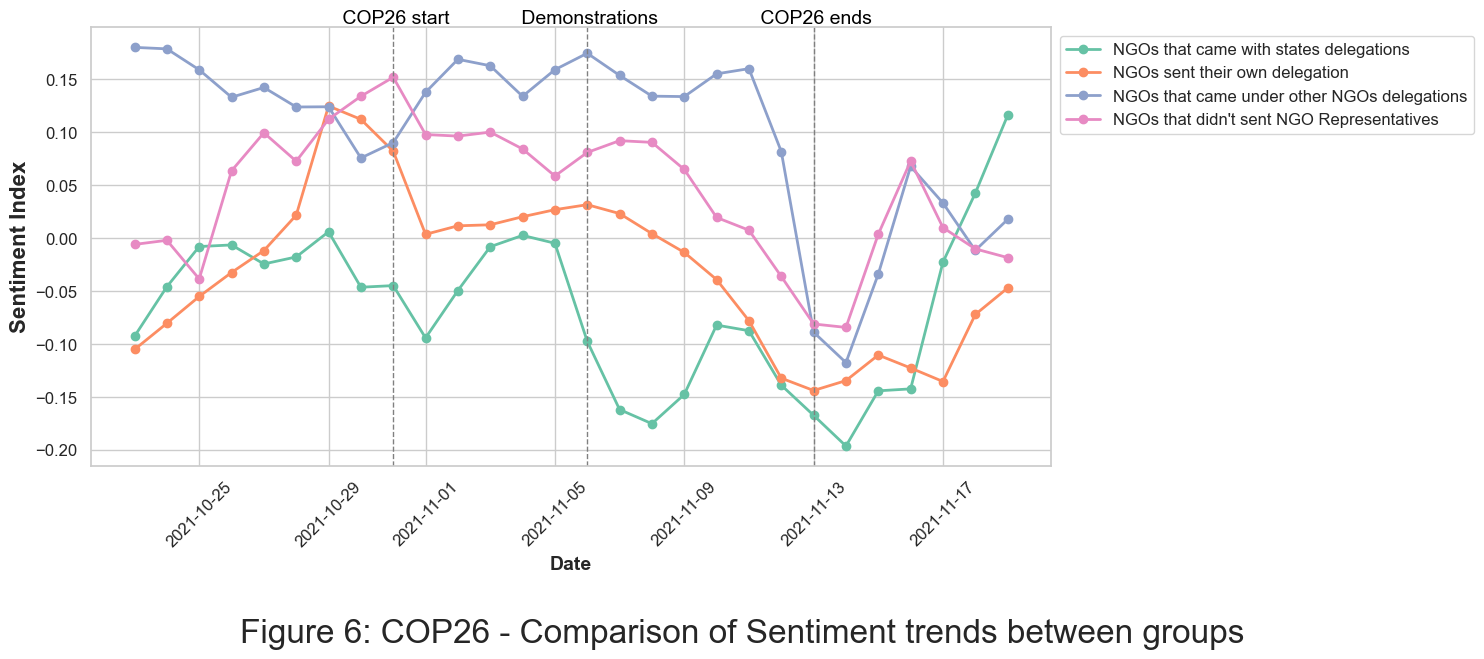

In [9]:
# Plot COP26 sentiment comparison by groups
plt.figure(figsize=(12, 8))
plot_sentiment_comparison3(
    cop26_groups,
    title='Figure 6: COP26 - Comparison of Sentiment trends between groups',
    sentiment_type="Sentiment Index",
    date_column="date",
    legend_names=LEGEND_NAMES,
    events=EVENTS_COP26,
    moving_avg_window=3
)
plt.show()

<Figure size 1200x800 with 0 Axes>

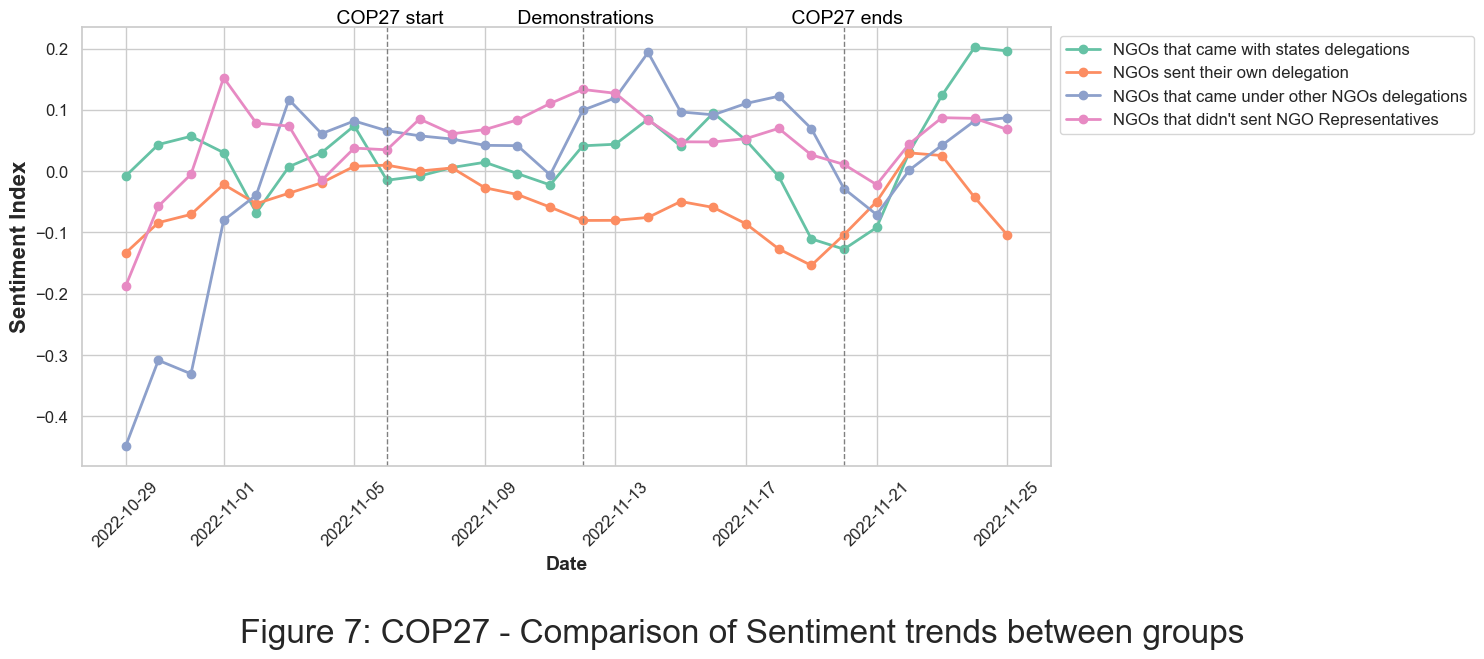

In [10]:
# Plot COP27 sentiment comparison by groups  
plt.figure(figsize=(12, 8))
plot_sentiment_comparison3(
    cop27_groups,
    title='Figure 7: COP27 - Comparison of Sentiment trends between groups',
    sentiment_type="Sentiment Index", 
    date_column="date",
    legend_names=LEGEND_NAMES,
    events=EVENTS_COP27,
    moving_avg_window=3
)

In [16]:
events = {'2021-10-31': 'COP start',
          '2021-11-06': 'Demonstrations', 
          '2021-11-13': 'COP ends'}

In [17]:
# Create data_sets for the comparison between years
data_sets = [cop26_overall, cop27_overall]

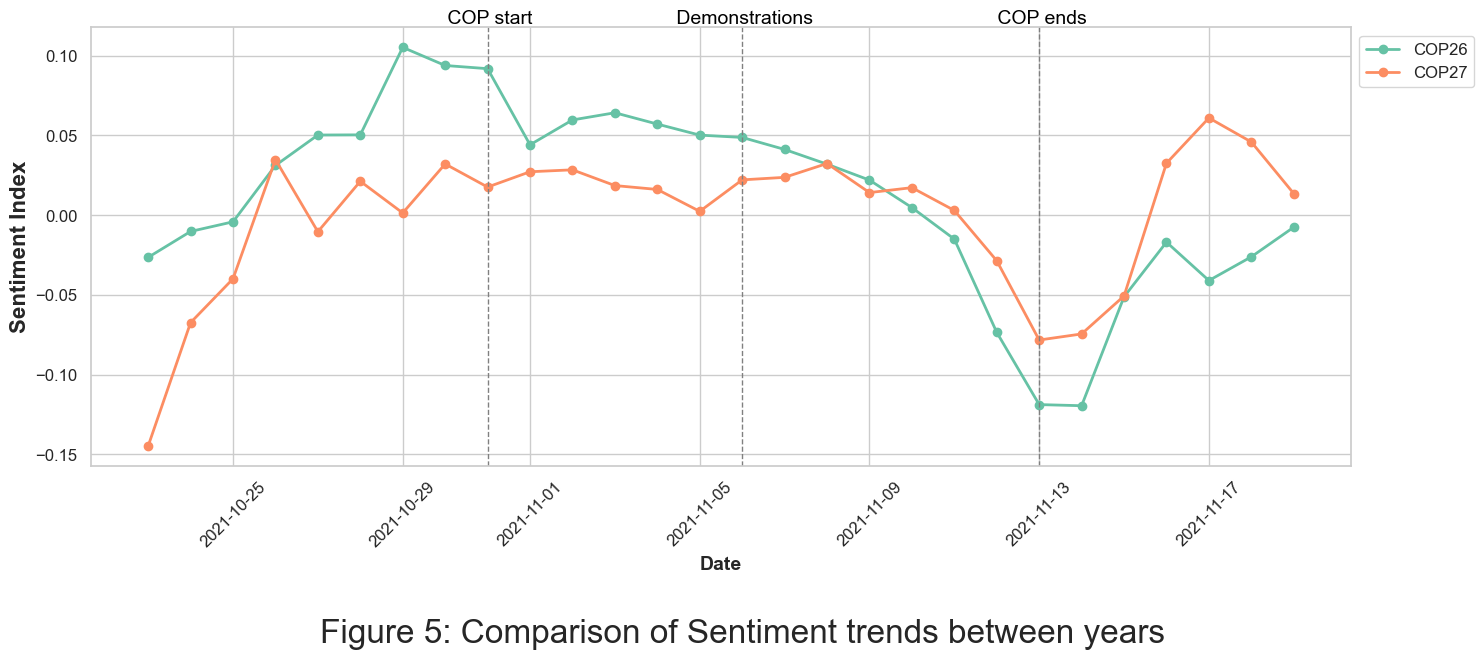

In [18]:
plot_sentiment_comparison3(data_sets, sentiment_type="Sentiment Index",
                           title='Figure 5: Comparison of Sentiment trends between years',
                           date_column="date",
                           legend_names=['COP26', 'COP27'],
                           events=events,
                           moving_avg_window=3)